# A1: Three-Layer Neural Network

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1">Requirements</a></span></li><li><span><a href="#Example-Results" data-toc-modified-id="Example-Results-2">Example Results</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-3">Discussion</a></span></li></ul></div>

## Requirements

In this assignment, you will start with code from lecture notes 04 and add code to do the following. You will implement and apply a neural network as in lecture notes 04 but now with an additional hidden layer.  The resulting three-layer network will consist of three weight matrices, `U`, `V` and `W`.

First, implement the forward pass to calculate outputs of each layer:

* Define functions `add_ones` and `rmse` by copying it from the lecture notes.
* Define function `forward_layer1` with two arguments, the input `X` and the first layer's weights `U`. It calculates and returns the output, `Zu`, of the first layer, using the `tanh` activation function.
* Define function `forward_layer2` with two arguments, the input `Zu` and the second layer's weights `V`. It calculates and returns the output, `Zv`, of the second layer, using the `tanh` activation function.
* Define function `forward_layer3` with two arguments, the input `Zv` and the third layer's weights `W`. It calculates and returns the output, `Y`, of the third layer as just the weighted sum of the inputs, without an activation function.
* Define function `forward` with four arguments, the input `X` to the network and the weight matrices, `U`, `V` and `W` of the three layers. It calls the above three functions and returns the outputs of all layers, `Zu`, `Zv`, `Y`.

Now implement the backward pass that calculates `delta` values for each layer:

* Define function `backward_layer3` that accepts as arguments the target values `T` and the predicted values `Y` calculated by function `forward`. It calculates and returns `delta_layer3` for layer 3, which is just `T - Y`.
* Define function `backward_layer2` that accepts as arguments `delta_layer3`, `W` and `Zv` and calculates and returns `delta` for layer 2 by back-propagating `delta_layer3` through `W`.
* Define function `backward_layer1` that accepts as arguments `delta_layer2`, `V` and `ZU` and calculates and returns `delta` for layer 1 by back-propagating `delta_layer2` through `V`.
* Define function `gradients` that accepts as arguments `X`, `T`, `Zu`, `Zv`, `Y`, `U`, `V`, and `W`, and calls the above three functions and uses the results to calculate the gradient of the mean squared error between `T` and `Y` with respect to `U`, `V` and `W` and returns those three gradients.

Now you can use `forward` and `gradients` to define the function `train` to train a three-layer neural network.
          
* Define function `train` that returns the resulting values of `U`, `V`, and `W` and the `X` and `T` standardization parameters.  Arguments are unstandardized `X` and `T`, the number of units in each of the two hidden layers, the number of epochs and the learning rate. This function standardizes `X` and `T`, initializes `U`, `V` and `W` to uniformly distributed random values between -0.1 and 0.1, and updates `U`, `V` and `W` by the learning rate times their gradients for `n_epochs` times as shown in lecture notes 04.  This function must call `forward`, `gradients` and `add_ones`.  It must also collect in a list called `rmse_trace` the root-mean-square errors for each epoch between `T` and `Y`.

      def train(X, T, n_units_U, n_units_V, n_epochs, rho):
          .
          .
          .
          return rmse_trace, U, V, W, X_means, X_stds, T_means, T_stds

Then we need a function `use` that calculates an output `Y` for new samples.  

* Define function `use` that accepts unstandardized `X`, standardization parameters, and weight matrices `U`, `V`, and `W` and returns the unstandardized output.

      def use(X, X_means, X_stds, T_means, T_stds, U, V, W):
          .
          .
          .
          Y = ....
          return Y

## Example Results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Add code cells here to define the functions above.  Once these are correctly defined, the following cells should run and produce the same results as those here.

In [2]:
Xtrain = np.arange(4).reshape(-1, 1)
Ttrain = Xtrain ** 2

Xtest = Xtrain + 0.5
Ttest = Xtest ** 2

Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((4, 1), (4, 1), (4, 1), (4, 1))

In [3]:
U = np.array([[1, 2, 3], [4, 5, 6]])  # 2 x 3 matrix, for 2 inputs (include constant 1) and 3 units
V = np.array([[-1, 3], [1, 3], [-2, 1], [2, -4]]) # 2 x 3 matrix, for 3 inputs (include constant 1) and 2 units
W = np.array([[-1], [2], [3]])  # 3 x 1 matrix, for 3 inputs (include constant 1) and 1 output unit
U.shape, V.shape, W.shape

((2, 3), (4, 2), (3, 1))

In [4]:
X_means = np.mean(Xtrain, axis=0)
X_stds = np.std(Xtrain, axis=0)
Xtrain_st = (Xtrain - X_means) / X_stds
Xtrain_st

array([[-1.34164079],
       [-0.4472136 ],
       [ 0.4472136 ],
       [ 1.34164079]])

In [5]:
T_means = np.mean(Ttrain, axis=0)
T_stds = np.std(Ttrain, axis=0)
Ttrain_st = (Ttrain - T_means) / T_stds
Ttrain_st

array([[-1.        ],
       [-0.71428571],
       [ 0.14285714],
       [ 1.57142857]])

In [7]:
Zu = forward_layer1(Xtrain_st, U)
Zu

array([[-0.99967774, -0.99983726, -0.99991782],
       [-0.65775956, -0.23177837,  0.3065367 ],
       [ 0.99246605,  0.99958165,  0.99997685],
       [ 0.9999941 ,  0.99999995,  1.        ]])

In [8]:
Zv = forward_layer2(Zu, V)
Zv

array([[-9.64016194e-01,  9.95062648e-01],
       [-5.23485834e-01, -4.06326878e-01],
       [-6.74345774e-03,  9.94823310e-01],
       [-5.79521329e-06,  9.95054578e-01]])

In [9]:
Y = forward_layer3(Zv, W)
Y

array([[ 0.05715556],
       [-3.2659523 ],
       [ 1.97098301],
       [ 1.98515214]])

In [10]:
Zu, Zv, Y = forward(Xtrain_st, U, V, W)
print(f'{Zu=}')
print(f'{Zv=}')
print(f'{Y=}')

Zu=array([[-0.99967774, -0.99983726, -0.99991782],
       [-0.65775956, -0.23177837,  0.3065367 ],
       [ 0.99246605,  0.99958165,  0.99997685],
       [ 0.9999941 ,  0.99999995,  1.        ]])
Zv=array([[-9.64016194e-01,  9.95062648e-01],
       [-5.23485834e-01, -4.06326878e-01],
       [-6.74345774e-03,  9.94823310e-01],
       [-5.79521329e-06,  9.95054578e-01]])
Y=array([[ 0.05715556],
       [-3.2659523 ],
       [ 1.97098301],
       [ 1.98515214]])


In [11]:
delta_layer3 = backward_layer3(Ttrain_st, Y)
delta_layer3

array([[-1.05715556],
       [ 2.55166659],
       [-1.82812587],
       [-0.41372357]])

In [12]:
delta_layer2 = backward_layer2(delta_layer3, W, Zv)
delta_layer2

array([[-0.14942424, -0.03123998],
       [ 3.70482892,  6.39114758],
       [-3.65608548, -0.05663488],
       [-0.82744715, -0.01224587]])

In [13]:
delta_layer1 = backward_layer1(delta_layer2, V, Zu)
delta_layer1

array([[-1.56687861e-04,  8.70954047e-05, -2.85795848e-05],
       [ 1.29800416e+01, -9.63794665e-01, -1.64490088e+01],
       [-5.74324794e-02,  6.06940191e-03, -3.28089886e-04],
       [-1.02032268e-05,  1.79372045e-07, -1.62184098e-09]])

In [14]:
grad_U, grad_V, grad_W = gradients(Xtrain_st, Ttrain_st, Zu, Zv, Y, U, V, W)
print(f'{grad_U=}')
print(f'{grad_V=}')
print(f'{grad_W=}')

grad_U=array([[-12.92244218,   0.95763799,  16.44936549],
       [  5.83033911,  -0.43361979,  -7.35611199]])
grad_V=array([[ 0.92812794, -6.29102685],
       [ 6.74349351,  4.24106248],
       [ 5.19130234,  1.51895191],
       [ 3.19836999, -1.92147926]])
grad_W=array([[0.74733841],
       [0.30431595],
       [4.31908649]])


In [15]:
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
Y

array([[ 3.70004445],
       [-7.93083306],
       [10.39844055],
       [10.44803251]])

In [16]:
rmse_trace, U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 10, 10, 1000, 0.05)

In [17]:
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)
np.hstack((Ttrain, Y))

array([[ 0.00000000e+00, -1.59415209e-03],
       [ 1.00000000e+00,  9.99531326e-01],
       [ 4.00000000e+00,  4.00320313e+00],
       [ 9.00000000e+00,  8.99786767e+00]])

Text(0, 0.5, 'RMSE')

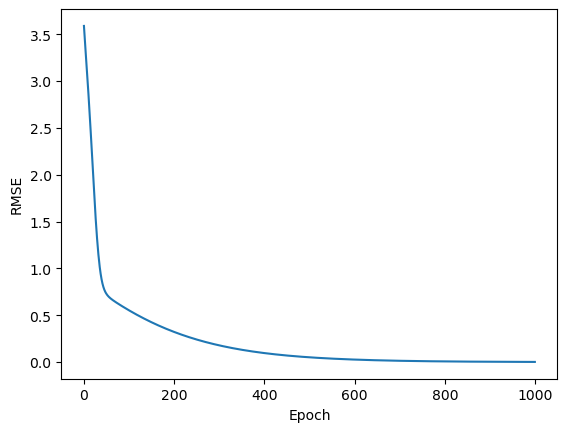

In [18]:
plt.plot(rmse_trace)
plt.xlabel('Epoch')
plt.ylabel('RMSE')

Here is another example with a little more interesting data.

In [19]:
n = 30
Xtrain = np.linspace(0., 20.0, n).reshape((n, 1)) - 10
Ttrain = 0.2 + 0.05 * (Xtrain + 10) + 0.4 * np.sin(Xtrain + 10) + 0.2 * np.random.normal(size=(n, 1))

Xtest = Xtrain + 0.1 * np.random.normal(size=(n, 1))
Ttest = 0.2 + 0.05 * (Xtest + 10) + 0.4 * np.sin(Xtest + 10) + 0.2 * np.random.normal(size=(n, 1))

In [20]:
rmse_trace, U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 5, 5, 100, 0.01)

Text(0, 0.5, 'RMSE')

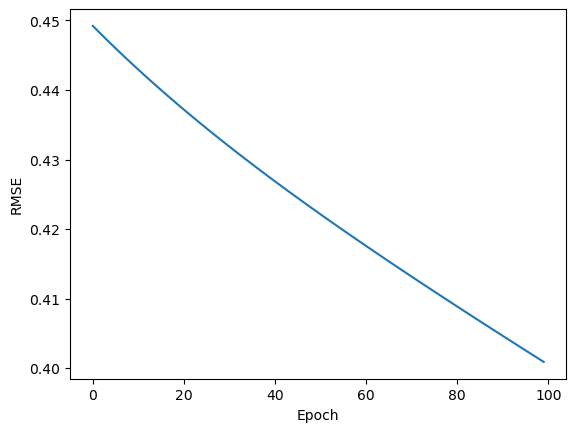

In [21]:
plt.plot(rmse_trace)
plt.xlabel('Epoch')
plt.ylabel('RMSE')

In [22]:
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)

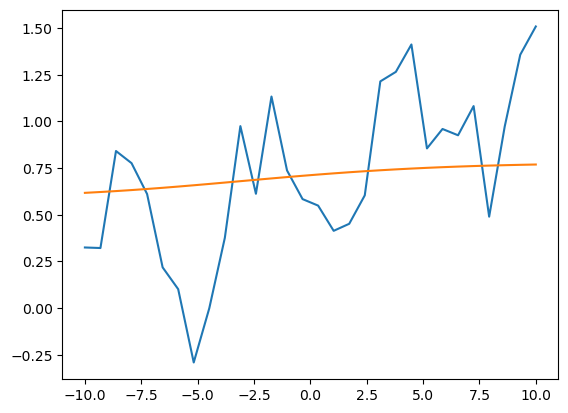

In [23]:
plt.plot(Xtrain, Ttrain)
plt.plot(Xtrain, Y);

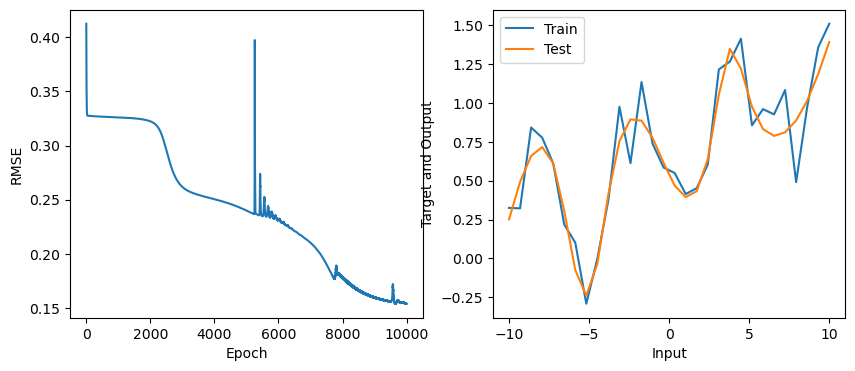

In [24]:
rmse_trace, U, V, W, X_means, X_stds, T_means, T_stds = train(Xtrain, Ttrain, 10, 5, 10000, 0.1)
Y = use(Xtrain, X_means, X_stds, T_means, T_stds, U, V, W)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(rmse_trace)
plt.xlabel('Epoch')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.plot(Xtrain, Ttrain, label='Train')
plt.plot(Xtrain, Y, label='Test')
plt.xlabel('Input')
plt.ylabel('Target and Output')
plt.legend();

Your plots will probably differ from these results, because you start with different random weight values.

## Discussion

In this markdown cell, describe what difficulties you encountered in completing this assignment. What parts were easy for you and what parts were hard?

# Grading

Your notebook will be run and graded automatically. Test this grading process by first downloading [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A1grader.tar) <font color="red">(updated August 28th)</font> and extract `A1grader.py` from it. Run the code in the following cell to demonstrate an example grading session.  The remaining 10 points will be based on your discussion of this assignment.

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  A perfect execution score from this grading script does not guarantee that you will receive a perfect execution score from the final grading script.

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [31]:
%run -i A1grader.py


Testing
    X = np.arange(4).reshape(-1, 1)
    T = np.log(X + 10)

    ni = 1
    nu = 2
    nv = 3
    U = np.arange((ni + 1) * nu).reshape(ni + 1, nu) * 0.1
    V = (np.arange((nu + 1) * nv).reshape(nu + 1, nv) - 6) * 0.1
    W = np.arange(nv + 1).reshape(nv + 1, 1) * -0.1

    a = forward_layer1(X, U)
    b = forward_layer2(a, V)
    c = forward_layer3(b, W)

    Zu, Zv, Y = forward(X, U, V, W)


--- 20/20 points. a, b, c, Zu, Zv and Y are correct.

Testing
    X = np.arange(4).reshape(-1, 1)
    T = np.log(X + 10)

    ni = 1
    nu = 2
    nv = 3
    U = np.arange((ni + 1) * nu).reshape(ni + 1, nu) * 0.1
    V = (np.arange((nu + 1) * nv).reshape(nu + 1, nv) - 6) * 0.1
    W = np.arange(nv + 1).reshape(nv + 1, 1) * -0.1

    Zu = np.array([[0.        , 0.09966799],
                   [0.19737532, 0.37994896],
                   [0.37994896, 0.60436778],
                   [0.53704957, 0.76159416]])
    Zv = np.array([[-0.53704957, -0.45424278, -0.36276513],
                   [-0

# Check-In

Do not include this section in your notebook.

Name your notebook ```Lastname-A1.ipynb```.  So, for me it would be ```Anderson-A1.ipynb```.  Submit the file using the ```Assignment 1``` link on [Canvas](https://colostate.instructure.com/courses/151263).

# Extra Credit

Apply your multilayer neural network code to a regression problem using data that you choose 
from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets.php). Pick a dataset that
is listed as being appropriate for regression.